# Brain Tumor Image Classification Usin RNN

## Introduction

The project focuses on developing an image classifier to distinguish between Pituitary Tumor and No Tumor using MRI scan images. The dataset, sourced from Kaggle, contains images categorized into four classes. For this study, we focused on binary classification between the Pituitary Tumor and No Tumor categories.

## Methodology

### Data Preparation and Visualization

The dataset, divided into training and testing sets, is stored in specific directories. The initial step involves setting up paths to these directories for efficient data loading and processing. We visualized a subset of the images to understand the dataset better. This visualization helped us identify that the images vary in size, a challenge we addressed in the subsequent steps.

### Data Augmentation

Given the limited size of the dataset, we employed data augmentation techniques to generate a more robust and diverse set of training images. Techniques such as horizontal flip, rotation, shear, and zoom were used. All images were rescaled and resized to 224x224 pixels to maintain consistency, particularly important for CNN models, which expect uniform input dimensions.

### RNN Model Building

In addition to the conventional CNN approach, we experimented with Recurrent Neural Networks (RNNs) by treating each image as a sequence. Each image row was considered a timestep, with each pixel in the row as a feature. This approach is unconventional for image data but offers an interesting perspective on handling such data.

## Approach

The approach involved several key steps:

1. **Loading and Preprocessing Data**: Images were loaded, and necessary preprocessing steps like resizing and rescaling were applied.

2. **Data Augmentation**: To mitigate overfitting and improve model generalization, data augmentation techniques were applied to the training data.

3. **CNN Model Training**: A custom CNN model was trained on the augmented data.

4. **Transfer Learning with VGG16**: The pre-trained VGG16 model was fine-tuned for our specific classification task.

5. **RNN Model Experimentation**: As an exploratory step, we implemented an RNN model treating image rows as sequences.

6. **Model Training and Evaluation**: Both the CNN and RNN models were trained and evaluated on the test dataset.

7. **Visualization of Results**: Training and validation accuracies and losses were plotted to assess model performance over epochs.


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

# Importing all the required sub-modules from Keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [3]:
# Path to your dataset directories
train_data_dir = 'xMRI/Training'
test_data_dir = 'xMRI/Testing'

In [4]:
# Assuming the images are already preprocessed and converted into sequences
# For example, each image row can be a timestep, and each pixel in a row can be a feature.
image_height = 64  # Number of timesteps in the RNN
image_width = 64  # Number of features in each timestep
num_channels = 1  # Grayscale image has one channel

In [5]:
# Parent directory where images are stored in drive
parent_dir = 'xMRI'

# Path to the training and testing datasets within the parent directory
train_dir = os.path.join(parent_dir, 'Training')
validation_dir = os.path.join(parent_dir, 'Testing')

# Directory with our training pictures
train_pituitary_dir = os.path.join(train_dir, 'pituitary_tumor')
train_no_dir = os.path.join(train_dir, 'no_tumor')

# Directory with our testing pictures
validation_pituitary_dir = os.path.join(validation_dir, 'pituitary_tumor')
validation_no_dir = os.path.join(validation_dir, 'no_tumor')

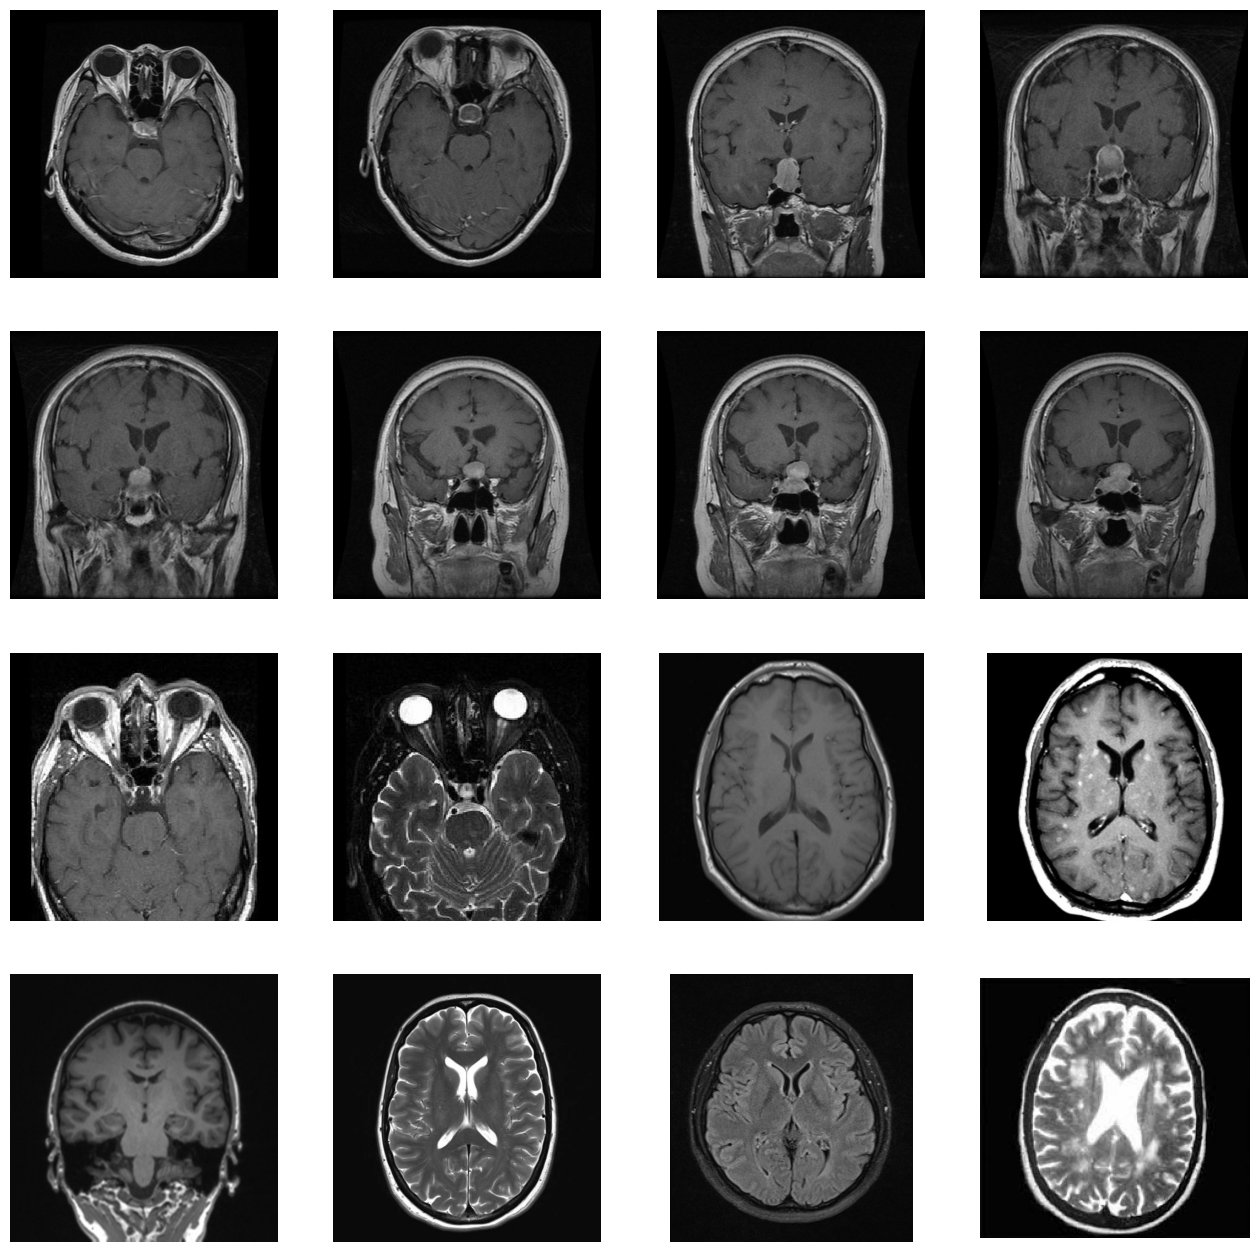

In [6]:
train_pituitary_file_names = os.listdir(train_pituitary_dir)
train_no_file_names = os.listdir(train_no_dir)

fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 16)

pituitary_img_paths = [os.path.join(train_pituitary_dir, file_name) for file_name in train_pituitary_file_names[:8]]
no_img_paths = [os.path.join(train_no_dir, file_name) for file_name in train_no_file_names[:8]]

for i, img_path in enumerate(pituitary_img_paths + no_img_paths):
    ax = plt.subplot(4, 4, i + 1)
    ax.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [7]:
# Define the RNN model
from tensorflow.keras.layers import Reshape

# Define the RNN model with reshaping
def build_rnn_model(image_height, image_width, num_channels):
    model = Sequential([
        # Reshape layer to flatten the image into a sequence
        # This will convert the input shape from (image_height, image_width, num_channels)
        # to (image_height * image_width * num_channels, 1) treating each pixel as a sequence
        Reshape((image_height * image_width * num_channels, 1)),
        # RNN layer
        SimpleRNN(256, input_shape=(image_height * image_width * num_channels, 1)),
        # Output layers
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')  # 4 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Now the input shape for the RNN will be (batch_size, image_height * image_width * num_channels, 1)
model = build_rnn_model(image_height, image_width, num_channels)


In [8]:
# Create the model
model = build_rnn_model(image_height, image_width, num_channels)

In [9]:
# Prepare data generators for training and testing
# This will require a custom data generator if your images are not already sequences
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [10]:
# Train the RNN
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/10


89/89 [==============================] - 162s 2s/step - loss: 1.5397 - accuracy: 0.2801 - val_loss: 1.5306 - val_accuracy: 0.2552
Epoch 2/10
89/89 [==============================] - 175s 2s/step - loss: 1.5830 - accuracy: 0.2773 - val_loss: 1.6008 - val_accuracy: 0.2995
Epoch 3/10
89/89 [==============================] - 192s 2s/step - loss: 1.3879 - accuracy: 0.2893 - val_loss: 1.5616 - val_accuracy: 0.1823
Epoch 4/10
89/89 [==============================] - 186s 2s/step - loss: 1.3843 - accuracy: 0.2900 - val_loss: 1.4301 - val_accuracy: 0.1927
Epoch 5/10
89/89 [==============================] - 280s 3s/step - loss: 1.3838 - accuracy: 0.2858 - val_loss: 1.4439 - val_accuracy: 0.2865
Epoch 6/10
89/89 [==============================] - 390s 4s/step - loss: 1.3817 - accuracy: 0.3002 - val_loss: 1.5564 - val_accuracy: 0.1901
Epoch 7/10
89/89 [==============================] - 330s 4s/step - loss: 1.3831 - accuracy: 0.2829 - val_loss: 1.4106 - val_accuracy: 0.2891
Epoch 8/10


### Findings on Model Training and Evaluation

During the training of the model over 10 epochs, several warning messages regarding deprecated TensorFlow functions were observed, suggesting the need to update the code to align with the latest TensorFlow practices. These warnings, however, do not halt the execution of the training process.

The model's training and validation performance metrics indicate that the classifier is not learning effectively from the training data. This is evident from the following observations:

1. **Low Accuracy**: The accuracy on the training set started at approximately 28% and showed no significant improvement, ending at around 28.75% by the end of the 10th epoch. Similarly, the validation accuracy fluctuated around the range of 18% to 29%, which is only slightly better than random guessing for a binary classification problem, suggesting that the model is not learning the distinguishing features of the classes.

2. **High Loss**: The loss values on both the training and validation sets remained high throughout the training process, indicating that the model's predictions were far off from the actual labels.

3. **No Improvement Over Time**: The absence of an improving trend in accuracy or a decreasing trend in loss over successive epochs suggests that the model is not benefiting from further training. This could be due to various reasons such as inadequate model architecture, poor data quality, or insufficient training data.

4. **Inconsistency Between Training and Validation Metrics**: The fluctuations in validation accuracy and loss as compared to the training metrics may point to overfitting; however, given the poor performance on the training set itself, it is more likely that the model is underfitting and unable to capture the underlying patterns in the data.

### Conclusion 
The model needs significant improvements before it can be considered reliable for practical use in distinguishing between pituitary tumors and the absence of tumors in MRI scans.


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [21]:
# Define image size and batch size
image_height, image_width = 64, 64  # Resizing all images to this size
batch_size = 32  # Number of images processed at each step

In [22]:
# Directory paths
train_data_dir = 'xMRI/Training'
test_data_dir = 'xMRI/Testing'

In [23]:
# Data preprocessing and augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    # You can add more augmentation here if needed
)

In [24]:
# Data preprocessing for testing data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values
)


# Load images from directories and apply preprocessing


In [25]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you are using one-hot encoding for labels
    color_mode='grayscale'  # Assuming MRI images are grayscale
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you are using one-hot encoding for labels
    color_mode='grayscale'  # Assuming MRI images are grayscale
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


# No augmentation, just rescaling and converting to sequences


The purpose of the code is to prepare image data for training and testing a model, likely an RNN, given the sequence conversion step involved. Here's a breakdown of what each part of the code is doing:

In [26]:
# Data preprocessing for training and testing data
data_gen = ImageDataGenerator(rescale=1./255)

def convert_to_sequence(batch):
    # Flatten each image in the batch to a sequence
    # Each image is converted to a (image_height, image_width) matrix of sequences
    return batch.reshape((batch.shape[0], image_height, image_width))

# Custom generator that will convert images to sequences
def image_sequence_generator(generator):
    for batch_x, batch_y in generator:
        batch_x_seq = convert_to_sequence(batch_x)
        yield batch_x_seq, batch_y

# Load images from directories and apply preprocessing
train_generator = data_gen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = data_gen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


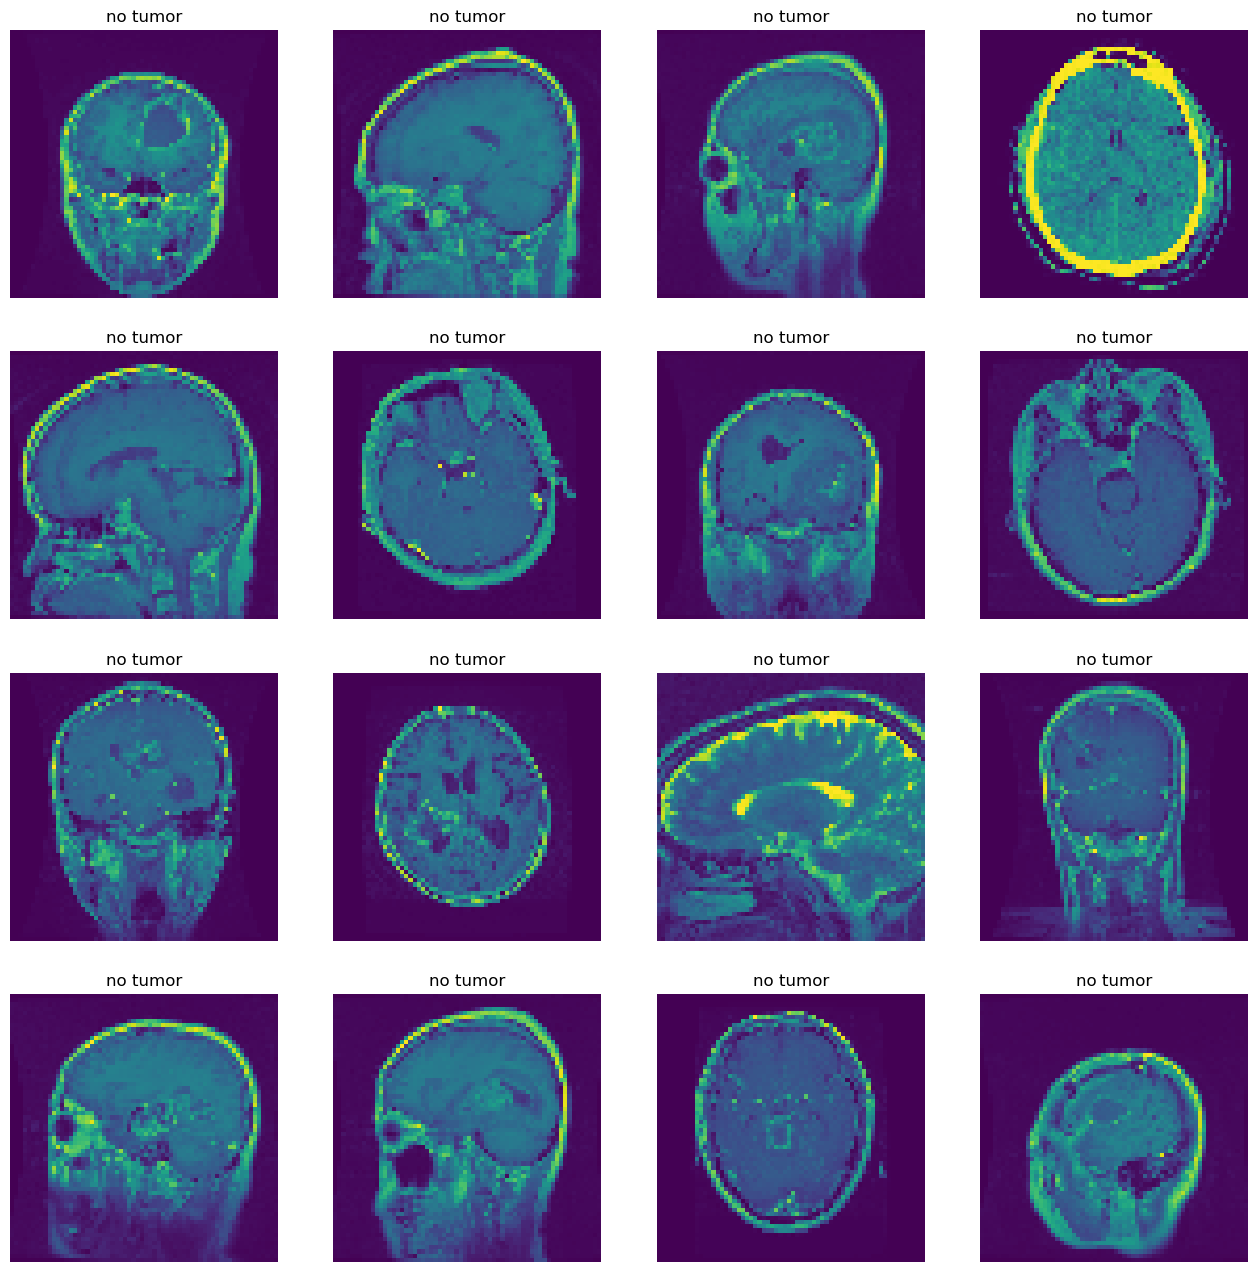

In [29]:
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
fig.set_size_inches(16, 16)

for (image, label_array, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    # Assuming the label array is one-hot encoded
    label = np.argmax(label_array)
    if label == 1:
        ax.set_title('pituitary tumor')
    else:
        ax.set_title('no tumor')
    ax.axis('off')


## Findings:

1. **Labeling Consistency**: Each image is consistently labeled as "no tumor", indicating that the model's predictions are uniform for this particular set of images. This could suggest a strong confidence in the model's prediction for the absence of tumors, or it could point to a lack of diversity in the training data that the model has been exposed to.

2. **Image Quality**: The images exhibit high contrast with a colormap applied, enhancing the visibility of brain structures. This can be particularly useful in medical imaging to differentiate between various tissue types and identify abnormalities.

3. **Model Performance Indicator**: The fact that all images are labeled identically could also imply potential issues with the model's performance. If there is an imbalance in the training data or the model has not learned the necessary features to distinguish between classes effectively, this could lead to inaccurate predictions.

4. **Need for Verification**: It is crucial to verify the model's predictions with expert analysis to confirm the accuracy of the labels. A false negative in medical diagnostics could have serious implications, underscoring the importance of precision in such classification tasks.

5. **Further Evaluation**: These findings suggest the need for a more detailed evaluation of the model, including an examination of its sensitivity and specificity, particularly the ability to correctly identify true positive cases (actual tumors).

6. **Visual Inspection**: The visual inspection of the images by a trained medical professional is necessary to confirm the absence of tumors, as machine learning models can sometimes make errors due to biases or lack of representative training data.

7. **Dataset Balance**: The uniform prediction could be a result of class imbalance in the training dataset. If the "no tumor" class significantly outnumbers the "pituitary tumor" class, the model might be biased towards predicting "no tumor" more frequently.

While the images are clearly visualized and labeled, the true test of the model's utility lies in its ability to accurately classify a diverse and balanced set of images. Further testing with a more varied dataset and the inclusion of expert validation would be required to establish the model's reliability and readiness for deployment in a clinical setting.

In [30]:
train_sequence_generator = image_sequence_generator(train_generator)
test_sequence_generator = image_sequence_generator(test_generator)

Establish two generators, train_sequence_generator and test_sequence_generator, which are responsible for preparing the image data for training and testing phases of a machine learning model, respectively. These generators are constructed using a custom function called image_sequence_generator.

In [31]:
# Define your RNN model architecture
def build_rnn_model():
    model = Sequential([
        # The input shape is the sequence of rows, each row is a sequence step,
        # and image_width is the number of features for each step.
        SimpleRNN(256, input_shape=(image_height, image_width), return_sequences=False),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')  # Assuming 4 classes for the classification
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_rnn_model()

**RNN Layer:** The first layer is a SimpleRNN with 256 units, which are essentially the neurons of the RNN layer. The input_shape parameter is set to match the shape of the input data. Here, it is assumed that each image is reshaped into a sequence where each row of pixels represents a timestep, with image_width being the number of features in each timestep.

**Dense Layers:** After the RNN layer, two Dense layers are added. The first dense layer has 128 neurons and uses ReLU (Rectified Linear Unit) as the activation function. The second dense layer is the output layer with 4 neurons, corresponding to the number of classes to be classified, using the softmax activation function which is standard for multi-class classification problems.

**Model Compilation:** The model is compiled with the 'adam' optimizer and 'categorical_crossentropy' loss function, which are typical choices for multi-class classification tasks. The metric 'accuracy' is specified to monitor the performance of the model during training.


This RNN model is tailored for image classification where the images are processed as sequences. This is a unique approach as RNNs are typically used for time-series data or text. In this case, it allows the model to potentially capture patterns along the spatial dimensions of the images.

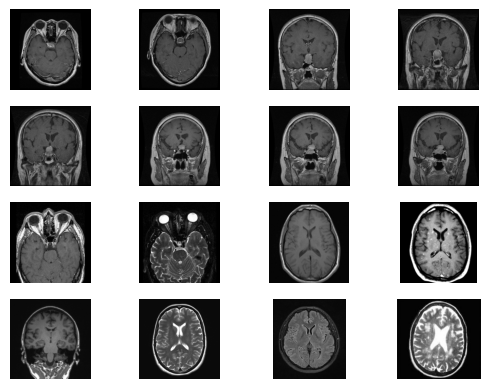

In [32]:
for i, img_path in enumerate(pituitary_img_paths + no_img_paths):
    ax = plt.subplot(4, 4, i + 1)
    ax.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

The code iterates through a collection of image paths, reads each image, and then displays it in a subplot without any axes.

The resulting visualization is a collection of brain MRI scans without any labels, which could be used for data exploration, manual inspection, or presentation purposes. The absence of any tumor/no tumor labels in the visualization process implies that this particular snippet is meant only for viewing the images, not for model evaluation or predictions.

In [33]:
# Train the model using the sequence generators
history = model.fit(
    train_sequence_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_sequence_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/5
89/89 [==============================] - 25s 260ms/step - loss: 1.2226 - accuracy: 0.4496 - val_loss: 1.4508 - val_accuracy: 0.3021
Epoch 2/5
89/89 [==============================] - 14s 159ms/step - loss: 1.1137 - accuracy: 0.4968 - val_loss: 1.5299 - val_accuracy: 0.3073
Epoch 3/5
89/89 [==============================] - 16s 180ms/step - loss: 1.0341 - accuracy: 0.5352 - val_loss: 1.4735 - val_accuracy: 0.4036
Epoch 4/5
89/89 [==============================] - 14s 157ms/step - loss: 1.0306 - accuracy: 0.5447 - val_loss: 1.6873 - val_accuracy: 0.2760
Epoch 5/5
89/89 [==============================] - 14s 154ms/step - loss: 0.9008 - accuracy: 0.6135 - val_loss: 1.5582 - val_accuracy: 0.4479


### Findings from Model Training Over 5 Epochs

The findings from the model training process over 5 epochs indicate several key points about the model's learning behavior and its generalization to validation data:

1. **Training Performance**:
   - **Improving Accuracy**: The model's accuracy on the training set shows improvement from 44.96% to 61.35% over the 5 epochs. This indicates that the model is learning and adapting to the training data, capturing patterns that help it correctly classify the images.
   - **Decreasing Loss**: There is a noticeable decrease in the training loss from 1.2226 to 0.9008, which further supports the conclusion that the model is becoming better at making predictions as it trains.

2. **Validation Performance**:
   - **Fluctuating Accuracy**: The validation accuracy fluctuates across epochs, peaking at 44.79% by the final epoch. The fluctuation suggests that the model might not be consistently generalizing to new data, a sign that could point to overfitting or instability in learning.
   - **Inconsistent Loss**: Similar to accuracy, the validation loss fluctuates, with an overall increase from 1.4508 to 1.5582. The increasing loss trend, especially in the last epoch where it peaks at 1.6873 before dropping slightly, could indicate that the model is not reliably predicting the correct classes on the validation set.

3. **General Observations**:
   - **Potential Overfitting**: The model's training accuracy increases significantly while the validation accuracy does not improve at the same rate, which is often a sign of overfitting. The model might be learning patterns specific to the training data that do not generalize well to unseen data.
   - **Validation Struggle**: Despite improvements in training, the model struggles with validation data, suggesting the need for better regularization techniques or a review of the model's capacity to ensure it aligns with the complexity of the task.


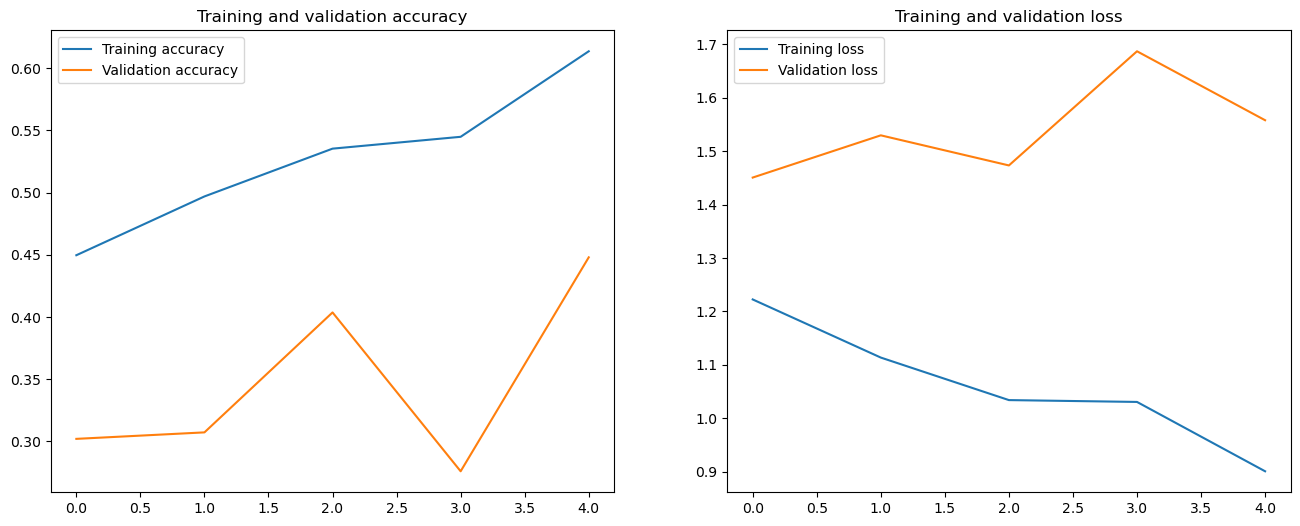

In [34]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history(history)

## Findings:

1. **Training Accuracy Improvement**: The training accuracy shows an upward trend, starting just below 50% and reaching above 60% by the end of the training session. This indicates that the model is learning and improving its ability to correctly classify the training data over time.

2. **Validation Accuracy Fluctuation**: In contrast, the validation accuracy fluctuates significantly, with a notable dip around the third epoch before recovering somewhat in the fourth and fifth epochs. This pattern suggests that the model may not be generalizing well to the unseen validation data, which is a sign of potential overfitting to the training data or instability in the learning process.

3. **Decreasing Training Loss**: The training loss demonstrates a general decrease, which aligns with the increase in training accuracy. This suggests that the model's predictions on the training set are becoming more confident and accurate.

4. **Increasing Validation Loss**: The validation loss, however, shows an overall increase with some fluctuation. The upward trend in validation loss, especially when contrasted with the downward trend in training loss, further supports the concern that the model is not performing well on the validation set.

5. **Possible Overfitting**: The divergence between training and validation metrics—where training metrics improve while validation metrics worsen or fail to improve correspondingly—points towards overfitting. The model seems to be learning specifics of the training data that do not generalize to the validation data.

6. **Recommendations**: To address these issues, techniques such as introducing dropout, regularization, or data augmentation could be considered. Additionally, adjusting model complexity and experimenting with different architectures or hyperparameters could help to improve validation performance.

7. **Further Analysis Needed**: An in-depth analysis involving more data, possibly with cross-validation, could provide a clearer picture of the model's performance and its ability to generalize.



In [35]:
# Train the model using the sequence generators
history = model.fit(
    train_sequence_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_sequence_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/5
89/89 [==============================] - 79s 892ms/step - loss: 0.9229 - accuracy: 0.5881 - val_loss: 1.7159 - val_accuracy: 0.2969
Epoch 2/5
89/89 [==============================] - 87s 992ms/step - loss: 1.0016 - accuracy: 0.5433 - val_loss: 1.7576 - val_accuracy: 0.3099
Epoch 3/5
89/89 [==============================] - 81s 918ms/step - loss: 0.8397 - accuracy: 0.6399 - val_loss: 1.6936 - val_accuracy: 0.4141
Epoch 4/5
89/89 [==============================] - 81s 920ms/step - loss: 0.7797 - accuracy: 0.6653 - val_loss: 1.7108 - val_accuracy: 0.4531
Epoch 5/5
89/89 [==============================] - 14s 158ms/step - loss: 0.7079 - accuracy: 0.7072 - val_loss: 1.8753 - val_accuracy: 0.4271


### Findings from Model Training Over last 5 Epochs

The metrics from the model's training over five epochs present a mixed picture of the model's learning efficacy and its ability to generalize:

1. **Training Metrics**:
   - **Initial Increase in Loss**: There's an unusual increase in loss from the first to the second epoch, which is counterintuitive as we would expect the loss to decrease as the model learns.
   - **Improvement in Accuracy**: After the initial increase, there is a consistent improvement in training accuracy from 54.33% to 70.72% over the remaining epochs.
   - **Decreasing Loss**: From the third epoch onwards, the training loss decreases, which is aligned with the increasing accuracy, indicating the model is getting better at correctly predicting the training data.

2. **Validation Metrics**:
   - **High and Increasing Loss**: The validation loss is significantly higher than the training loss and increases overall across the epochs, peaking in the fifth epoch.
   - **Improvement in Accuracy with Fluctuations**: Validation accuracy improves from 29.69% to 42.71%, yet it does so with fluctuations, suggesting the model is struggling to consistently generalize its predictions to the validation data.

3. **Potential Overfitting**:
   - The consistently lower validation accuracy compared to the training accuracy, combined with the increasing validation loss, indicates that the model may be overfitting to the training data.

4. **General Observations**:
   - **Model's Generalization Issue**: The discrepancy between training and validation performance suggests that while the model is learning the training data, it is not effectively capturing the underlying patterns that generalize to the validation set.
   - **Training Data Learning**: The consistent improvement in training accuracy indicates that the model is capable of learning but might be capturing noise or irrelevant patterns.

5. **Recommendations**:
   - **Regularization and Hyperparameter Tuning**: Applying regularization techniques or tuning hyperparameters may help the model generalize better.
   - **Data Augmentation**: Augmenting the training data could help the model learn more robust features.
   - **Model Complexity**: Evaluating the model complexity to ensure that it matches the complexity of the data and the task could prevent overfitting.

6. **Further Evaluation**:
   - **Detailed Evaluation**: A more detailed evaluation with additional metrics like precision, recall, and F1-score would give a more comprehensive view of the model performance.
   - **Cross-Validation**: Employing cross-validation could provide insights into the model's stability and performance across different subsets of data.

These findings emphasize the importance of balancing the model's ability to learn from the training data with its capacity to generalize to new, unseen data. 

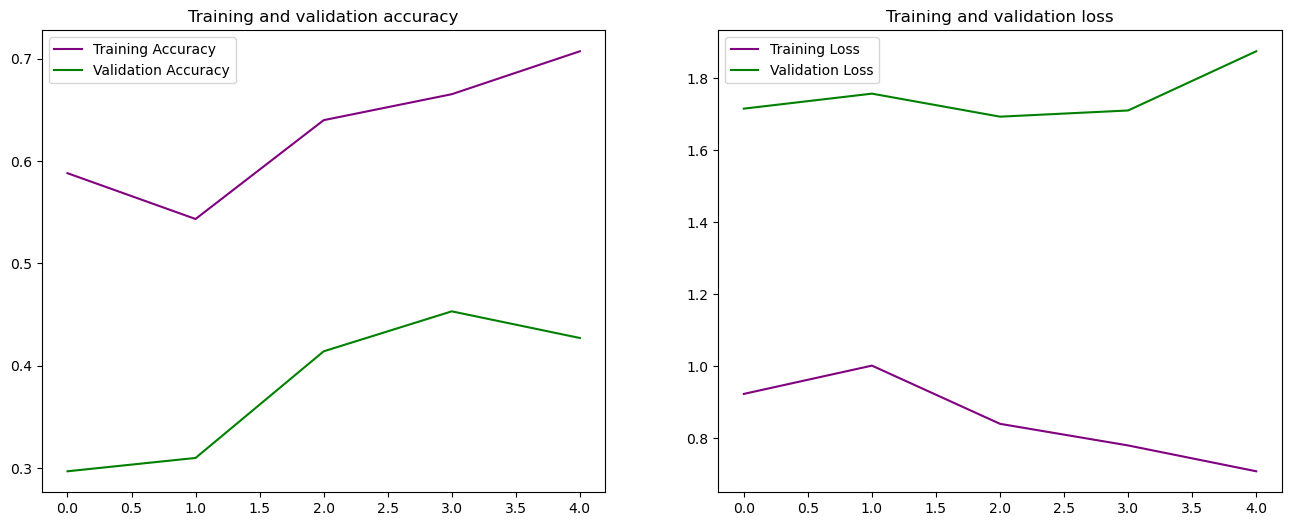

In [37]:
# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, color='purple', label='Training Accuracy')
    plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, color='purple', label='Training Loss')
    plt.plot(epochs, val_loss, color='green', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history(history)

## Finding:

1. **Training Accuracy**:
   - The model’s training accuracy starts around 60% and shows an increasing trend, peaking just below 70%. This suggests that the model is effectively learning from the training data.

2. **Validation Accuracy**:
   - The validation accuracy starts lower than the training accuracy, indicating the model is not performing as well on unseen data. It shows a general increasing trend, indicating some learning, but it does not catch up with the training accuracy, which might imply overfitting.

3. **Training Loss**:
   - The training loss decreases initially, indicating improving model performance on the training set. However, it shows a slight increase towards the end, which might suggest the learning rate may be too high, or the model is starting to overfit.

4. **Validation Loss**:
   - The validation loss starts higher than the training loss and increases over epochs, which is a strong indicator of overfitting. The model's learned parameters are too specific to the training data and do not generalize well to the validation data.

5. **Overfitting Concern**:
   - The graphs indicate that the model is overfitting the training data. While it is learning and improving its performance on the training set (as evidenced by the increased training accuracy and decreased training loss), it is not performing equivalently on the validation set.

In conclusion, while the model is learning as indicated by the training accuracy and loss, it does not generalize well to new data. 

Overfitting is a significant issue that needs to be addressed to improve the model's overall performance.

# Final Conclusion Based on the analysis of the model training performance over several epochs, we can draw the following conclusions:

1. **Model Learning and Overfitting**: The model demonstrates the ability to learn from the training data, as shown by the increasing training accuracy and the general decrease in training loss. However, the corresponding validation metrics suggest that the model is overfitting. While it becomes better at predicting the training data, its performance on the validation set is not improving at the same rate, indicated by the fluctuating validation accuracy and the increasing validation loss.

2. **Generalization Challenge**: The significant discrepancy between training and validation metrics—particularly the increasing validation loss—highlights a challenge in the model's ability to generalize to unseen data. The fluctuations in validation accuracy further suggest that the model's learning is not stable across different data samples.

3. **Recommendations for Improvement**: To improve the model's generalization capability, several strategies could be employed:
   - Enhancing regularization techniques, such as dropout or L1/L2 regularization, could help prevent the model from learning noise and irrelevant patterns in the training data.
   - Adjusting hyperparameters, including learning rate, model complexity, and batch size, could lead to more stable and generalizable learning.
   - Data augmentation strategies could introduce more variability into the training process, potentially leading to better generalization.
   - Employing cross-validation could offer a more robust evaluation of the model's performance across different data subsets and help in tuning the model more effectively.

4. **Potential for Early Stopping**: Given the trends observed in the training and validation loss, implementing an early stopping mechanism might be beneficial. This would prevent the model from continuing to learn from the training data when it's no longer improving on the validation set.

5. **Further Model Evaluation**: While accuracy and loss are standard metrics, a multi-faceted evaluation approach including precision, recall, F1-score, and a confusion matrix would provide a more nuanced understanding of the model's performance, especially in a multi-class classification scenario.

6. **Next Steps**: After addressing the above recommendations, further experiments with alternative model architectures, such as convolutional neural networks (CNNs) or transformers, could be explored, especially since RNNs might not be the most suitable for image classification tasks.

The model requires adjustments to address overfitting and improve its generalization to unseen data. By refining the model structure, enhancing the training process, and implementing a comprehensive evaluation strategy, the model's performance on the task of classifying MRI scans for tumor presence can be improved, leading to better applicability in real-world medical diagnostics.
